In [9]:
import gymnasium as gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
env = gym.make("Blackjack-v1", sab=True)

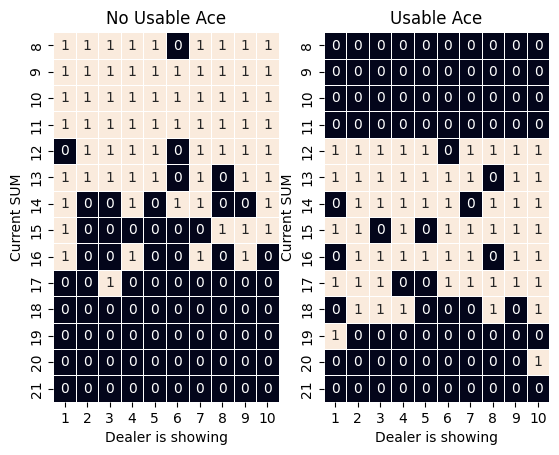

In [14]:

Q = np.zeros((32,10,2,2))
g = np.zeros((32,10,2,2))
pi=np.ones((32,10,2),dtype=int)

alpha=0.9
iterations=10000
alpha=1/500
gama=1.
eps_init = 1.
eps_decay = eps_init/(iterations/2)
eps_final = 0.1
eps=0.2

actions = []
rewards = []
for i in range(iterations):
    states = []
    actions = []
    rewards = []

    j=0
    data=env.reset()
    o=data[0]

    ep_end=False
    while ep_end != True:
        p=np.random.rand(1)
        eps=np.max([eps_final, eps-eps_decay])
        if p<eps:
            a=env.action_space.sample()
        else:
            a=np.argmax(Q[o[0]-1,o[1]-1,o[2],:])
        
        data=env.step(a)

        o=data[0]
        states.append(data[0])
        actions.append(int(a))
        rewards.append(data[1])

        ep_end=data[2]

    j=-1
    for state in states:
        j=j+1
        g[state[0]-1,state[1]-1,state[2],actions[j]]=np.sum(rewards[j:])
        Q[state[0]-1,state[1]-1,state[2],actions[j]]=Q[state[0]-1,state[1]-1,state[2],actions[j]]+alpha*(g[state[0]-1,state[1]-1,state[2],actions[j]]-Q[state[0]-1,state[1]-1,state[2],actions[j]])      

pi_opt=np.zeros((32,10,2),dtype=int)
for i in range(32):
    for j in range(10):
        for k in range(2):
            pi_opt[i,j,k]=np.argmax(Q[i,j,k,:])


plt.figure()
plt.subplot(1,2,1)
ax1 = sns.heatmap(pi_opt[7:21,:,0], cbar=False, linewidth=0.5, annot=True, xticklabels=np.arange(10)+1, yticklabels=np.arange(14)+8)
ax1.set(xlabel="Dealer is showing", ylabel= "Current SUM")
ax1.set(title="No Usable Ace")

plt.subplot(1,2,2)
ax = sns.heatmap(pi_opt[7:21,:,1], cbar=False, linewidth=0.5, annot=True, xticklabels=np.arange(10)+1, yticklabels=np.arange(14)+8)
ax.set(xlabel="Dealer is showing", ylabel= "Current SUM")
ax.set(title="Usable Ace")

plt.show()

